# ___Classification Model using Artificial Neural Networks___

_Within this excercise, we will practice the below classification problems using ANN._

* ___Churn Model___
* ___MNIST Classification Model___
* ___Breast Cancer Model___

In [ ]:
# Import required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## ___Model 2 - Churn Modelling___


### ___Preparing the Data___

In [ ]:
# Read data
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
X = df.iloc[:,3:13]
Y = df.iloc[:,13]

In [ ]:
# Creating dummy for Gender and Geography

gender = pd.get_dummies(df['Gender'], drop_first= True)
geography = pd.get_dummies(df['Geography'], drop_first= True)

X = pd.concat([X, gender, geography], axis = 1)
X.drop(['Gender', 'Geography'], axis = 1, inplace = True)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
7389,667,34,5,0.00,2,1,0,163830.64,0,0,1
9275,427,42,1,75681.52,1,1,1,57098.00,1,1,0
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,1,0,1
356,850,57,8,126776.30,2,1,1,132298.49,0,0,1


In [ ]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_sc = std.fit_transform(X_train)
X_test_sc = std.fit_transform(X_test)

### ___Building a Neural Network___

In [ ]:
import tensorflow
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import ReLU, LeakyReLU

In [ ]:
# Creating an Artificial Neural Network

model = Sequential()

# Adding first Input Layer
model.add(Dense(units = 11, activation='relu', kernel_initializer='he_uniform', input_dim = 11))

# Adding Hidden Layer
model.add(Dense(units = 6, activation='relu', kernel_initializer='he_uniform'))

# Adding Output Layer
model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))

# Compiling the Model
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

fitted = model.fit(X_train, y_train, validation_split= 0.33, batch_size= 10, epochs= 100)

Epoch 1/100
536/536 [==============================] - 2s 4ms/step - loss: 1050.9808 - accuracy: 0.6966 - val_loss: 301.0496 - val_accuracy: 0.7709
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 175.1133 - accuracy: 0.6880 - val_loss: 280.8235 - val_accuracy: 0.5021
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 148.6611 - accuracy: 0.6899 - val_loss: 129.4481 - val_accuracy: 0.4991
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 101.5450 - accuracy: 0.6897 - val_loss: 88.2836 - val_accuracy: 0.7827
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 94.4107 - accuracy: 0.6880 - val_loss: 91.5081 - val_accuracy: 0.6634
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 88.8133 - accuracy: 0.6893 - val_loss: 73.0846 - val_accuracy: 0.5884
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 89.6461 - accuracy: 0.6929 - val_loss: 69.7197 

### ___Understanding the Model___

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 15.9545 - accuracy: 0.7885


[15.954458236694336, 0.7885000109672546]

### ___Plotting Learning Curves___

In [ ]:
# list all data in history

print(fitted.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


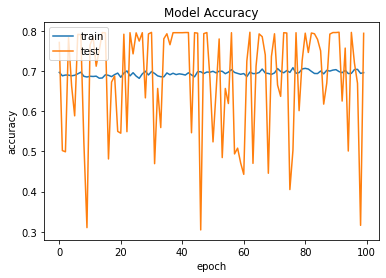

In [ ]:
# Summarize Accuracy Improvements

plt.plot(fitted.history['accuracy'])
plt.plot(fitted.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

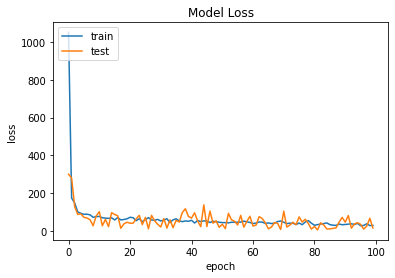

In [ ]:
# Summarize Loss Improvements

plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### ___Model Predictions___

In [ ]:
# Predicting the Test Results

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1566,   29],
       [ 394,   11]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score

score=accuracy_score(y_pred, y_test)
score

0.7885

## ___Model 2 - MNIST Classification Model___

In [ ]:
# Getting the inbuilt dataset from Keras

mnist = keras.datasets.fashion_mnist
type(mnist)

module

In [ ]:
# The data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
np.max(X_train) # Checking Max value

255

In [ ]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

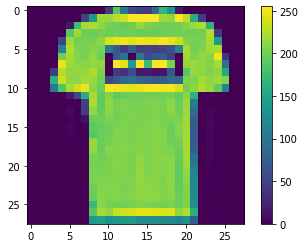

In [ ]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

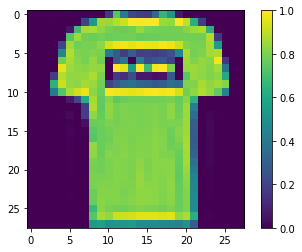

In [ ]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

#### ___Building a Neural Network___

In [ ]:
from keras.layers import Flatten, Activation

# Creating Neural Networks

model = Sequential()

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4928 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3744 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3367 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3145 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2818 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2699 - accuracy: 0.8988
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2570 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2477 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Test Accuracy

test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8820
0.8820000290870667


#### ___Multiclass Model Predictions___

In [ ]:
y_pred = model.predict_classes(X_test)
accuracy_score(y_test, y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.882

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
model.predict(X_test)[0]

array([7.6248219e-10, 4.5455961e-10, 3.2949565e-10, 1.3376920e-10,
       1.1433449e-09, 5.3243042e-04, 3.9494878e-09, 2.3643386e-03,
       7.1302422e-09, 9.9710315e-01], dtype=float32)

In [ ]:
pred = model.predict(X_test)
pred

array([[7.6248219e-10, 4.5455961e-10, 3.2949565e-10, ..., 2.3643386e-03,
        7.1302422e-09, 9.9710315e-01],
       [5.7749926e-06, 2.7244340e-14, 9.9931741e-01, ..., 3.7240361e-22,
        6.3436194e-09, 4.6079427e-13],
       [6.1259717e-09, 1.0000000e+00, 1.0582790e-12, ..., 8.4795113e-31,
        6.8041576e-15, 2.1479526e-22],
       ...,
       [2.7482328e-04, 6.8700661e-12, 2.7827753e-05, ..., 3.6611503e-08,
        9.9914443e-01, 4.9135408e-13],
       [1.6821981e-07, 9.9998820e-01, 9.5965881e-11, ..., 6.5893969e-18,
        2.8428693e-09, 2.4904261e-12],
       [1.3132025e-05, 1.4554941e-07, 6.9442249e-05, ..., 5.0701499e-03,
        1.7677080e-04, 1.2167361e-05]], dtype=float32)

In [ ]:
np.argmax(pred[0])

9

## ___Model 3 - Breast Cancer Model___

In [ ]:
# Read data
data = pd.read_csv('/content/breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Benign 357
Malignanat 212


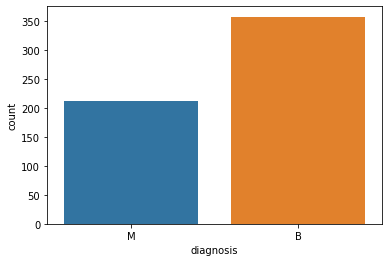

In [ ]:
ax = sns.countplot(data['diagnosis'], label= 'Count')
B,M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)

In [ ]:
# Importing data
del data['Unnamed: 32']

X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### ___Building a Neural Network___

In [ ]:
#adding the input and first hidden layer
classifier = Sequential()
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu',input_dim=30))
classifier.add(Dropout(0.2))

#adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(0.2))

#adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.6374
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.6681
Epoch 3/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.7165
Epoch 4/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.7648
Epoch 5/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.8440
Epoch 6/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.8791
Epoch 7/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6664 - accuracy: 0.9055
Epoch 8/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.9253
Epoch 9/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.9253
Epoch 10/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.9407
Epoch 11/150
5/5 [===========

#### ___Performance___

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  2],
       [ 3, 44]])

## ___K-Fold Cross Validation___

In [ ]:
# Libraries
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
def built_classifier(optimizers = 'adam'):
  classifier = Sequential()
  classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu',input_dim=30))
  classifier.add(Dropout(0.2))

  #adding the second hidden layer
  classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
  classifier.add(Dropout(0.2))

  #adding the output layer
  classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

  classifier.compile(optimizer= optimizers, loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

In [ ]:
classifier = KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs=150)

accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10, n_jobs =-1)

In [ ]:
accuracies

array([1.        , 1.        , 1.        , 0.97826087, 0.95652175,
       0.95555556, 0.97777778, 1.        , 0.97777778, 0.97777778])

In [ ]:
accuracies.mean()

0.9823671519756317

In [ ]:
accuracies.std()

0.016463791332592098

## ___Parameter Tuning___

In [ ]:
# Libraries

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

### ___To find Batch Size, Epochs, Optimizer, No. of Hidden Layers and No. of Units/Neurons___

In [ ]:
def create_model(layers, activation, optimizers):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer= optimizers, loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)

layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
optimizers = ['adam', 'rmsprop']
batch_size = [10, 32]
epochs = [100, 500]

param_grid = dict(layers = layers, activation = activations, batch_size = batch_size, scoring = 'accuracy', epochs = epochs)

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv=2)

grid_result = grid.fit(X_train, y_train)

In [ ]:
grid_result.best_score_

In [ ]:
grid_result.best_params_